<a href="https://colab.research.google.com/github/hyuntaedo/Machine_learning_Concept/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<strong>Logistic Regression(로지스틱 회귀)</strong>


##<strong>Logistic Regression(로지스틱 회귀) 란 무엇인가?</strong>
- 로지스틱 회귀는 회귀를 사용하여 데이터가 어떤 범주에 속한 확률을 0에서 1사이의 값으로 예측하고, 그 확률에 따라 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘(supervised Learning)이다.


- 스팸메일 분류기 같은것을 생각하면 쉽게 생각이 된다.
- 어떤 메일을 받았을 경우, 스팸일 확률이 0.5이상이게 된다면, spam으로 분류하고, 0.5보다 낮은 경우, ham메일로 분류를 하는 것이다.
- 이렇게 2개의 범주중 하나에 속하도록 결정하는것을 <strong>2진분류(binary classification)</strong>이라 한다.


예를들어 학생이 공부하는 시간에 따라 시험에 합격할 확률이 달라진다고 하면
선형회귀를 사용한다면, 아래와 같은 그림으로 나타나게 된다.


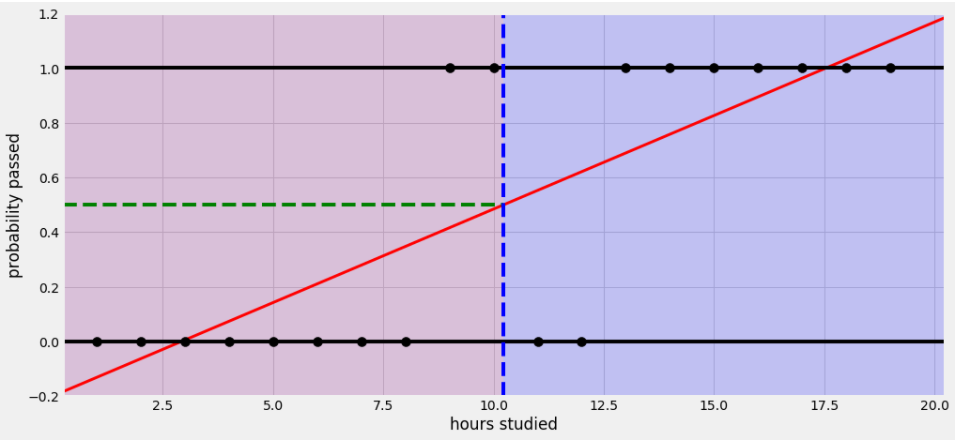

- 공부한 시간이 적으면 시험에 통과를 하지 못하고, 공부한 시간이 많다면 통과가 된다는 식으로 설명이 가능하다 하지만 회귀선을 살펴보자면 2시간 이하는 시험에 통과할 확률이 음수 즉 0으로 뻗게 된다.

- 만약 로지스틱 회귀를 사용하면 아래와 같이 나타나게 된다.


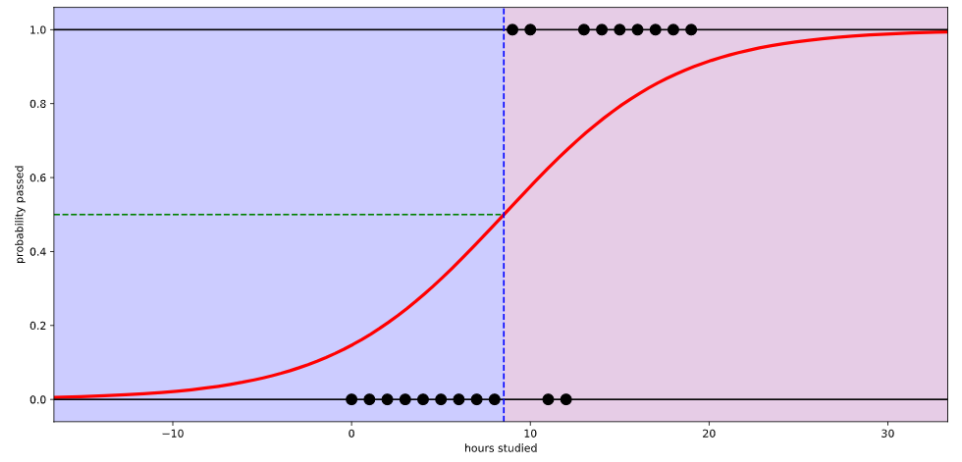

시험에 합격할 확률이 0과 1사이로 좁혀지게 된다.


- 로지스틱 회귀에서는 데이터가 <strong>특정 범주에 속할 확률을 예측하기 위한 단계를 거치게 된다.</strong>

1. 모든 속성(feature)들의 계수(coefficient)와 절편(intercept)를 0으로 초기화한다.
2. 각 속성들의 값(value)에 계수(coefficient)를 곱해서 <strong>log-odds</strong>를 구한다.
3. <strong>log-odds</strong>를<strong>sigmoid함수</strong>에 넣어서 [0,1]범위의 확률을 구한다.


##<strong>Log-Odds</strong>




###<strong>1)개념</strong>


- 선형회귀에서는 각 속성의 값에다가 계수(coefficient)를 곱하고 절편(intercept)를 더해서 예측값을 구하게 된다.
- 그래서 구한 예측값의 범위는 음의무한대 부터 양의무한대 까지이다. <strong>로지스틱회귀</strong>도 마찬가지이다.
- 하지만 마지막 예측값 대신 log-odds라는것을 구해줘야 한다는 차이가 있다.

일단 log-odds를 구하려면 odds 부터 구해야한다


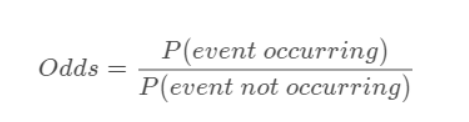

이것이 odds를 구하는 방법이다.


즉 사건이 일어날 확률 / 사건이 일어나지 않을 확률 이 odds이다. 
- 만약 0.7 확률로 시험에 합격을 하게 된다면, 당연히 시험에 떨어질 확률은 0.3이니 계산은 이렇게 된다


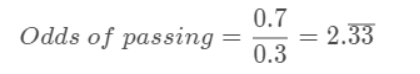

여기서 log값을 취한것이 log-odds이다.


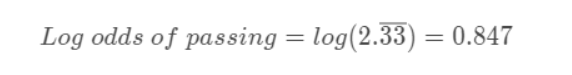

###<strong>2)계산</strong>


로지스틱 회귀에서는 아래와 같이 여러 속성(feature)들에 계수(coefficient)를 곱하고 절편(intercept)을 더해서 최종값 log-odds를 구해야 하기 때문에 좀 까다롭다 그래서 여기서 dot product방식으로 log-odds를 구해야 한다.


In [ ]:
import numpy as np
log_odds - np.dot(feature,coefficient) + intercept

방식으로 구할 수 있다.


##<strong>Sigmoid Function</strong>


로지스틱 회귀에서는 0에서 1사이로 커브 모양을 나타내야 하는데, 이걸 가능하게 해주는것이 sigmoid fucntion이다.


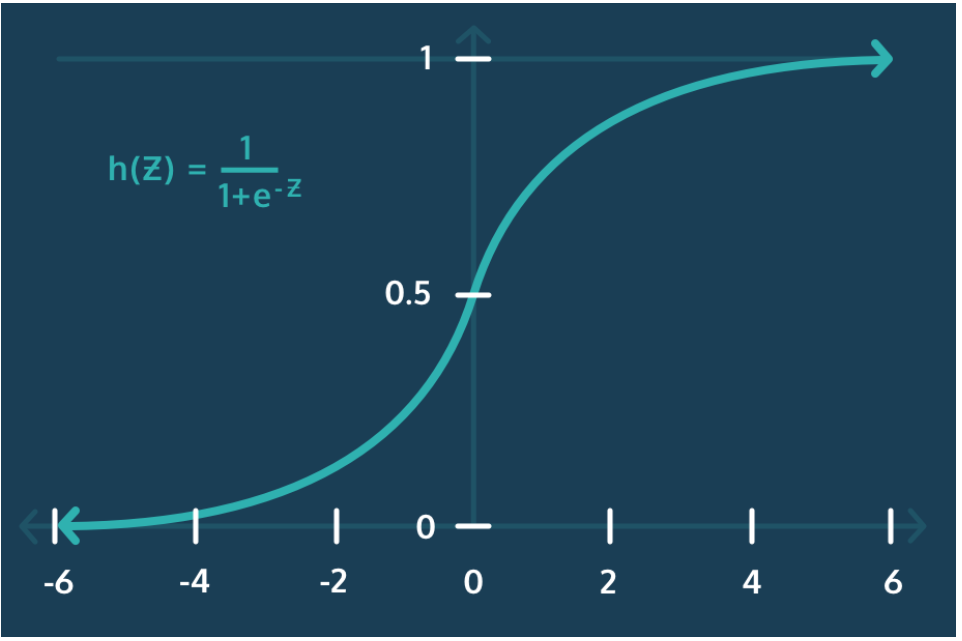

위에서 구한 log-odds를 sigmoid function에 넣어 0부터 1사이 값으로 변환시켜 주는 것이다.


numpy에서는 `np.exp()`로 쉽게 변환이 가능하다.


##<strong>Log Loss(로그손실)</strong>
- 로지스틱 회귀가 확률을 제댈 예측해 주는지, 즉 구해놓은 속성의 계수(coefficient)와 절편(intercept)이 적절한지 확인하기 위해서 손실을 고려해야 한다.

- 이는 모델의 "적합성"을 평가하기 위해서 각 데이터들의 샘플의 손실(모델 예측이 얼마나 잘못 되었는가?)를 계산한 다음 그것을 평균화 해야한다.



<strong>로지스틱 회귀에 대한 손실 함수는 Log Loss</strong> 라 부르며 아래와 같이 구할 수 있다.


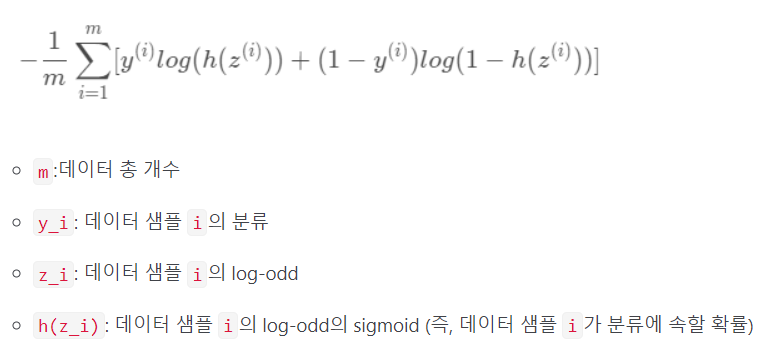

- 즉 여기서 말하는 바는 로지스틱 함수를 구성하는 계수와 절편에 대해 Log Loss를 최소화 하는 값을 찾는 다는것이 방점이다.


하지만 로그손실을 2개로 나누어서 생각할 필요가 있다.


2진분류를 하기 때문에, 특정범주로 분류될 것인가 아니면 그렇지 않은가로 나뉘어 지게 된다.


- 어떤 데이터 샘플 클래스가 y인 경우 즉 학생이 시험에 합격한 경우의 손실은 아래와 같이 계산된다.


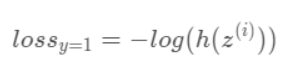

이 데이터의 손실은 그냥 학생이 시험에 통과할 확률에 로그를 씌운것이다.


- 반대로 학생이 시험에 탈락할 경우는


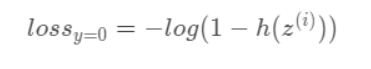

이런식으로 계산하게 된다. 



즉 이렇게
- 예측이 잘못되면서 손실이 점진적으로 증가하는 꼴을 줄이고, 올바른 예측을 하면서 손실이 작아지는 모델에 가까워지도록 하는 게 우리의 목표가 될 것이다. 그래서 선형 회귀와 마찬가지로 경사하강법(Gradient Descent)을 사용하여 모든 데이터에서 로그 손실(Log Loss)을 최소화하는 계수를 찾을 수 있다.